# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["feels_like"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kovalam
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | benguela
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | kismayo
Processing Record 16 of Set 1 | nieuw amsterdam
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | polyarnyy
Processing Record 22 of Set 1 | lompoc
Processing Record 2

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

42.65


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kovalam,8.3667,76.9967,27.05,30.15,75,4.12,IN,1688617768
1,waitangi,-43.9535,-176.5597,9.56,4.55,82,16.21,NZ,1688617770
2,benguela,-12.5763,13.4055,18.25,18.43,1,0.62,AO,1688617771
3,ushuaia,-54.8000,-68.3000,1.81,-2.14,40,4.12,AR,1688617772
4,isafjordur,66.0755,-23.1240,6.03,3.44,100,3.46,IS,1688617773


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kovalam,8.3667,76.9967,27.05,30.15,75,4.12,IN,1688617768
1,waitangi,-43.9535,-176.5597,9.56,4.55,82,16.21,NZ,1688617770
2,benguela,-12.5763,13.4055,18.25,18.43,1,0.62,AO,1688617771
3,ushuaia,-54.8000,-68.3000,1.81,-2.14,40,4.12,AR,1688617772
4,isafjordur,66.0755,-23.1240,6.03,3.44,100,3.46,IS,1688617773


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

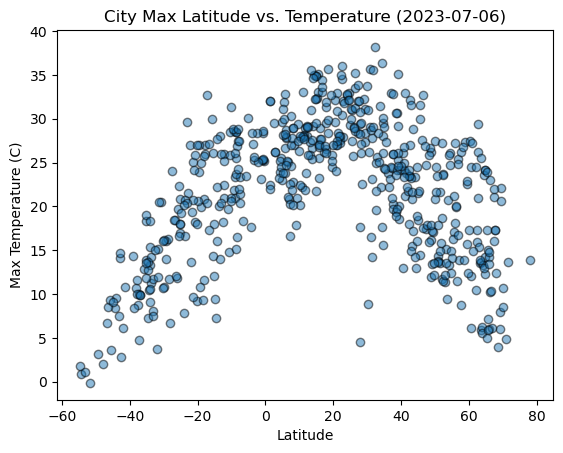

In [14]:
# Build scatter plot for latitude vs. temperature
lattemp_x = city_data_df["Lat"]
lattemp_y = city_data_df["Max Temp"]
plt.scatter(lattemp_x,lattemp_y,edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-07-06)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The max humidity recorded is: 42.65%


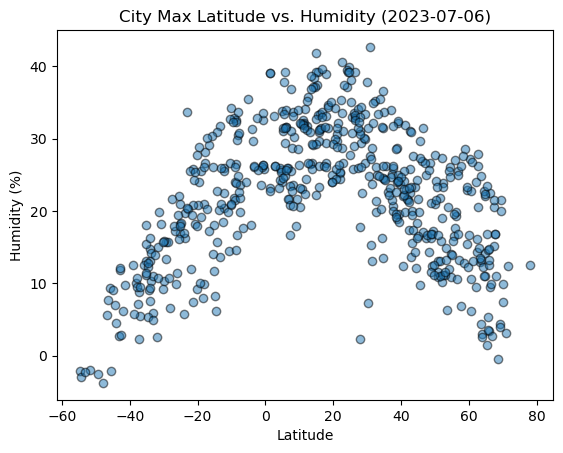

In [28]:
# Build the scatter plots for latitude vs. humidity
lathum_x = city_data_df["Lat"]
lathum_y = city_data_df["Humidity"]
plt.scatter(lathum_x,lathum_y,edgecolors="black",alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2023-07-06)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
maxhum = city_data_df["Humidity"].max()
print(f"The max humidity recorded is: {maxhum}%")
plt.show()

#### Latitude Vs. Cloudiness

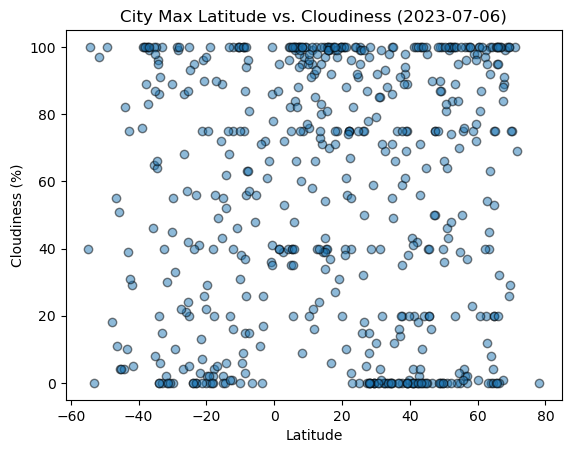

In [30]:
# Build the scatter plots for latitude vs. cloudiness
latcloud_x = city_data_df["Lat"]
latcloud_y = city_data_df["Cloudiness"]
plt.scatter(latcloud_x,latcloud_y,edgecolors="black",alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2023-07-06)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

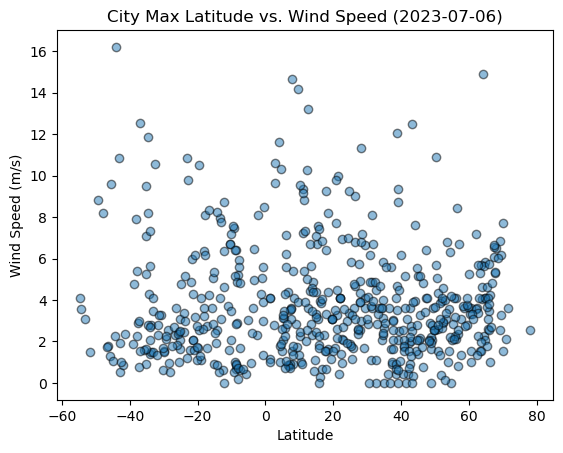

In [32]:
# Build the scatter plots for latitude vs. wind speed
latwind_x = city_data_df["Lat"]
latwind_y = city_data_df["Wind Speed"]
plt.scatter(latwind_x,latwind_y,edgecolors="black",alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2023-07-06)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kovalam,8.3667,76.9967,27.05,30.15,75,4.12,IN,1688617768
4,isafjordur,66.0755,-23.1240,6.03,3.44,100,3.46,IS,1688617773
8,bethel,41.3712,-73.4140,23.83,22.96,0,0.00,US,1688617580
10,saipan,15.1355,145.7010,32.39,37.36,40,6.69,MP,1688617781
11,hamilton,39.1834,-84.5333,25.31,24.16,0,2.06,US,1688617493


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,waitangi,-43.9535,-176.5597,9.56,4.55,82,16.21,NZ,1688617770
2,benguela,-12.5763,13.4055,18.25,18.43,1,0.62,AO,1688617771
3,ushuaia,-54.8000,-68.3000,1.81,-2.14,40,4.12,AR,1688617772
5,tolanaro,-25.0319,46.9987,18.04,18.20,20,2.06,MG,1688617774
6,puerto natales,-51.7236,-72.4875,-0.13,-1.92,97,1.51,CL,1688617776


###  Temperature vs. Latitude Linear Regression Plot

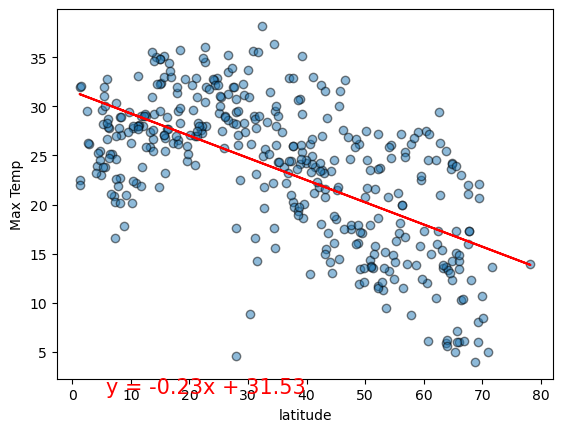

In [68]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Max Temp")
plt.show()

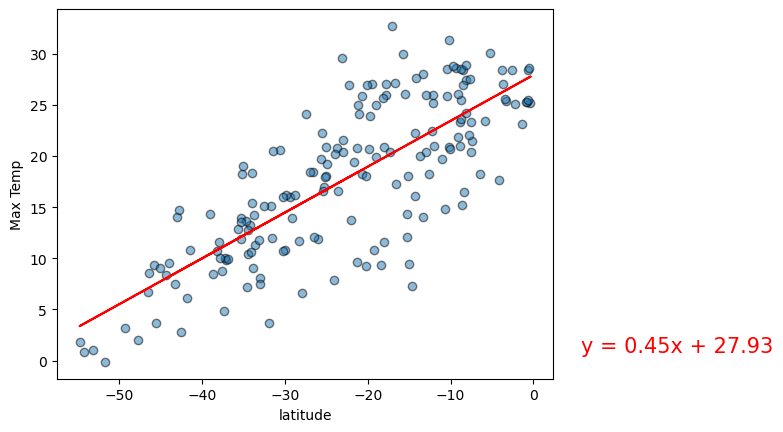

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression of latitude versus hemisphere shows a negative relationship between distance from the equator (lat = 0) and Temperature. This is confirmed as it can be seen that as the absolute value for the latitude increases (abs(lat)) the maximum recorded temperature decreases accordingly. This makes sense as we can see the lower temperatures at the north and south poles.

### Humidity vs. Latitude Linear Regression Plot

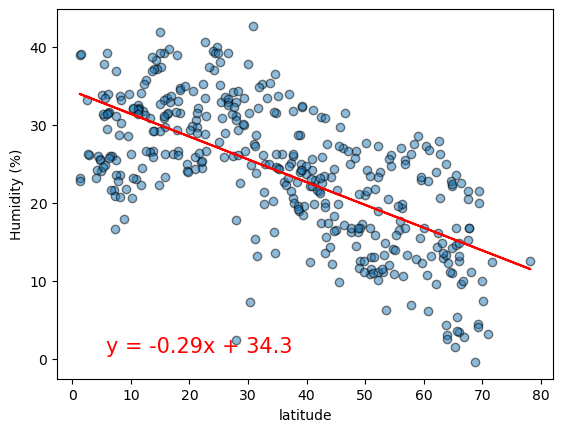

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.show()

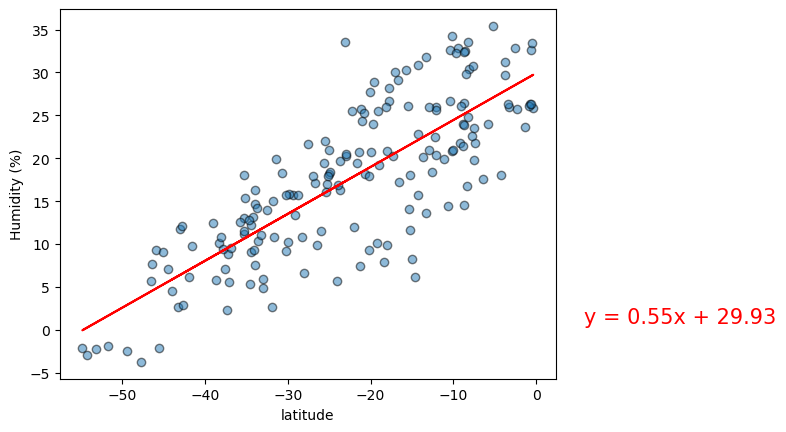

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
We can see a negative relationship between the absolute value for latitude (abs(lat)) and humidity, this is likely related to temperatre as warmer temperatures make it easier for higher humidity environments to exist as seen in the tropics, which are found across the equator.

### Cloudiness vs. Latitude Linear Regression Plot

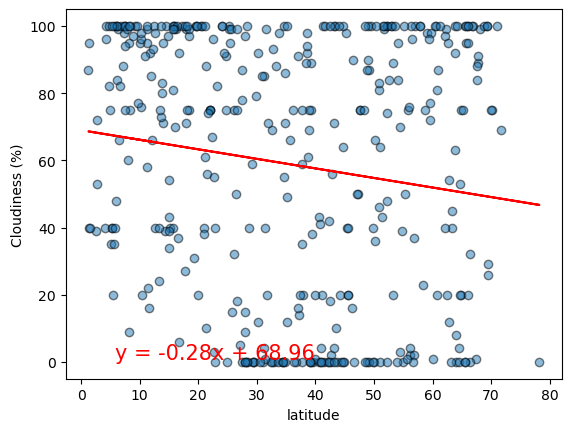

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

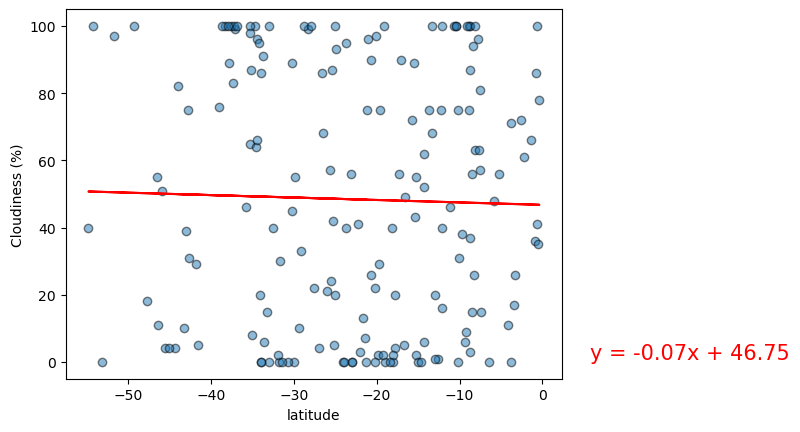

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The linear regression analysis shows no real relationship between Cloudiness and latitude, however this analysis suggests that in the norther hemisphere there is a slightly negative correlation between latitude and cloudiness. There is no real relationship as this is not equally reflected in the southern hemisphere data.

### Wind Speed vs. Latitude Linear Regression Plot

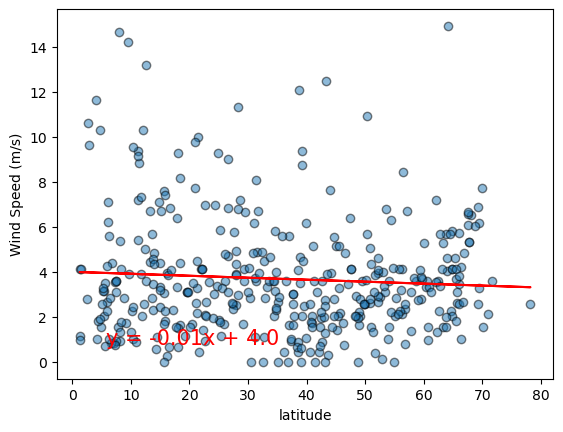

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

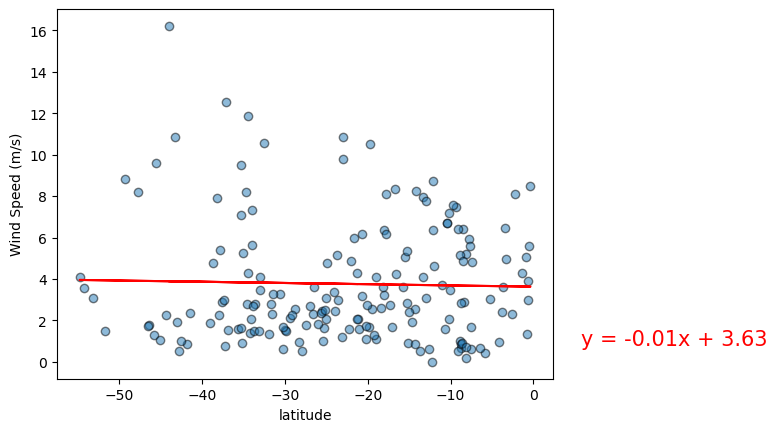

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
As with Cloudiness, there is no significant relationship between wind speed and latitude.